**Annual money spent on Ecommerce website or app**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns



data has Customer info such as Email, Address, and their color Avatar. 

**Avg. Session Length**: Average session of in-store style advice sessions.

**Time on App**: Average time spent on App in minutes

**Time on Website**: Average time spent on Website in minutes

**Length of Membership**: How many years the customer has been a member.


In [ ]:
data = pd.read_csv('/content/Ecommerce Customers')

In [ ]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.shape

(500, 8)

In [ ]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Hence our data is almost clean and don't have any null values

**Exploratory Data Analysis**

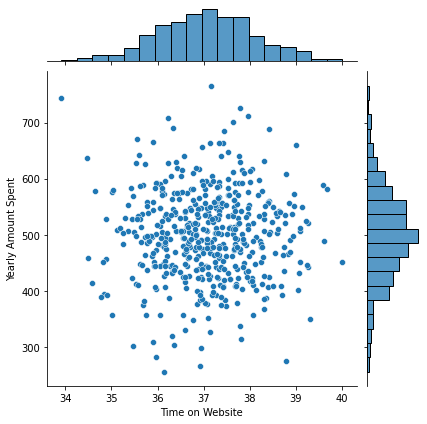

In [ ]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = data)

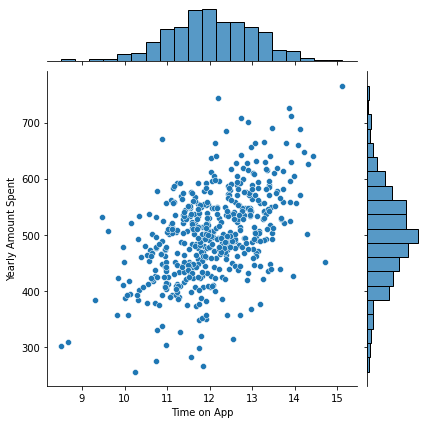

In [ ]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data)

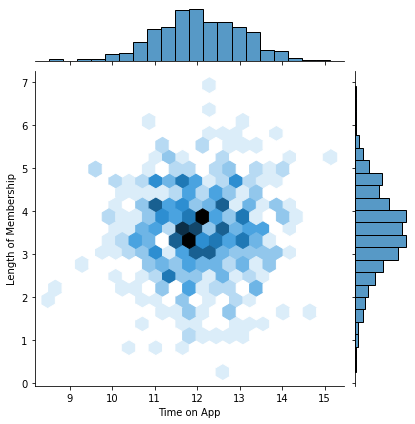

In [ ]:
sns.jointplot(x='Time on App',y ='Length of Membership', data = data, kind='hex')

Hexbin plot with marginal distribution

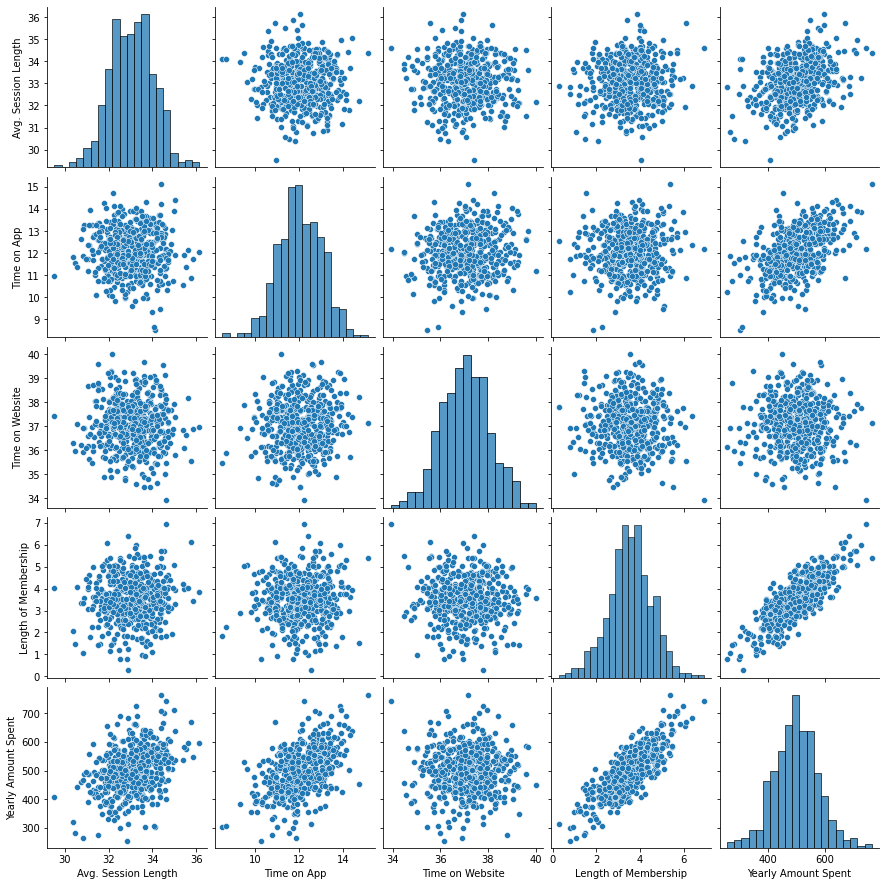

In [ ]:
sns.pairplot(data)

from the above fig , there is positive correlation between Length of Membership and Yearly Amount Spent


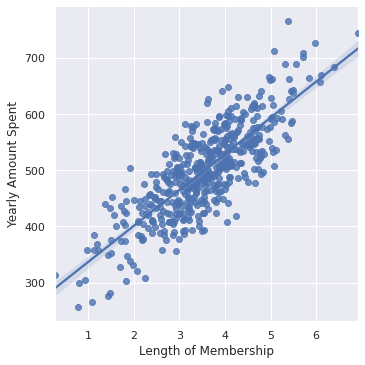

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=data)

**Correlation Matrix**


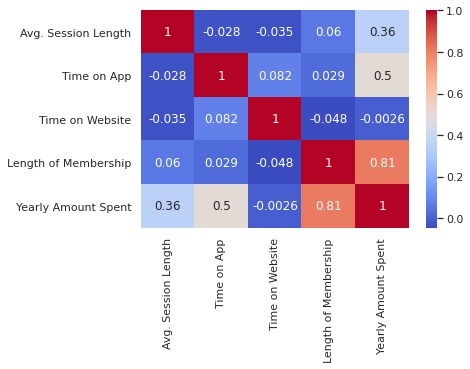

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Training and Testing Data**

In [ ]:
X = data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [ ]:
y= data['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

test_size = 0.33 means we distribute our data into 67% for train & 33% test
>random_state is for selecting random rows from dataset

**Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.coef_)
coef=model.coef_

[25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
print("coeff for Avg. Session Length ",coef[0])
print("coeff for Time on App ",coef[1])
print("coeff for Time on Website ",coef[2])
print("coeff for Length of Membership ",coef[3])

coeff for Avg. Session Length  25.981549723495792
coeff for Time on App  38.59015875311409
coeff for Time on Website  0.19040527751100633
coeff for Length of Membership  61.27909654482186


**Predicting Test Data**

In [ ]:
predictions = model.predict(X_test)

Text(0.5, 0, 'Y test')

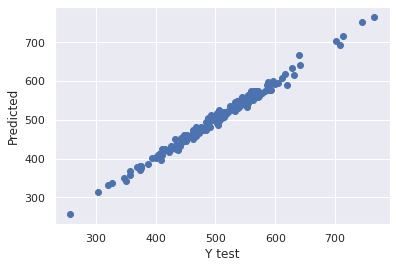

In [ ]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

As you can see our predicted values is very close to actual values.
means it is quite good.

**Evaluating the Model**

In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


In [ ]:
print("accuracy of model is: ",model.score(X_test,y_test))

accuracy of model is:  0.9890046246741234


In [ ]:
model.score(X,y)

0.9842727142336021

In [ ]:
features = ['Avg. Session Length','Time on App','Time on Website','Length of Membership']
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 4) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)

Features                :  ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
Regression Coefficients :  [25.9815, 38.5902, 0.1904, 61.2791]
R-squared               :  0.98
Y-intercept             :  -1047.93


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


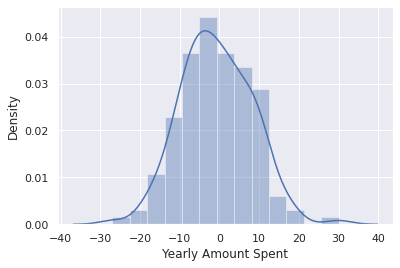

In [ ]:
sns.distplot((y_test-predictions))

**Conclusion**

As we can conclude that time spent on app or website doesn't even matter.
But it depends on membership period. from this we can more focus on our sales and improves our targeted users.